In [1]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
from os import listdir
from os.path import isfile, join

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


import pickle

from dgl.nn import GraphConv
from dgl.dataloading import GraphDataLoader

import pickle

In [2]:
pickle_name = 'domain_dataset.pickle'
with open(pickle_name, 'rb') as f:
    dataset = pickle.load(f)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


NameError: name 'train_dataset' is not defined

In [4]:
def evaluate(model, dataloader):
    model.eval()
    num_correct = 0
    num_tests = 0
    for batched_graph, labels in dataloader:
        pred = model(batched_graph, batched_graph.ndata['node_fv'].float())
        num_correct += (pred.argmax(1) == labels).sum().item()
        num_tests += len(labels)
    return num_correct / num_tests

def train(model, device, train_loader, optimizer, epoch, training=True):
    if training:
        model.train()
    else:
        model.eval()
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        output = model(data, data.ndata['one'].float())
        loss = F.nll_loss(output, target)
        if not training:
            return loss.item()
#         print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        return loss.item()
    

In [5]:
for i in range(10):

    train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)
    train_loader = GraphDataLoader(train_dataset, batch_size=500)
    test_loader = GraphDataLoader(test_dataset, batch_size=500)


    model = GCN(1, 32, 2)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



    losses = []
    eval_losses = []
    trn_acc = []
    tst_acc = []
    for epoch in range(400):
        if epoch%100 == 0:
            print(epoch)
        loss = train(model, device, train_loader, optimizer, epoch)
        eval_loss = train(model, device, test_loader, optimizer, epoch, False)
        eval_losses.append(eval_loss)
        losses.append(loss)
        trn_acc.append(evaluate(model, train_loader))
        tst_acc.append(evaluate(model, test_loader))

#     print(f"train acc: {train_acc} test acc: {test_acc}")
    plt.figure()
    plt.title('losses')
    plt.plot(losses, 'b', label='train set')
    plt.plot(eval_losses, 'r', label='test set')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.savefig(f'400epochs loss 1_32_FC fold{i}.png')
    
    plt.figure()
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy [%]')
    plt.plot(trn_acc, 'b', label='train set')
    plt.plot(tst_acc, 'r', label='test set')
    plt.legend()
    plt.savefig(f'400epochs accuracy 1_32_FC fold{i}.png')


NameError: name 'GCN' is not defined

In [234]:
print(model)

GCN(
  (in_layer): GraphConv(in=4, out=32, normalization=both, activation=None)
  (inner_layer): GraphConv(in=32, out=32, normalization=both, activation=None)
  (out_layer): GraphConv(in=32, out=32, normalization=both, activation=None)
  (fc): Linear(in_features=32, out_features=2, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)


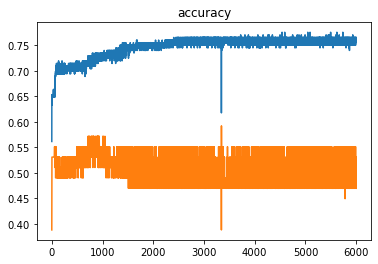

In [197]:
plt.figure()
plt.title('accuracy')
plt.plot(trn_acc)
plt.plot(tst_acc)
plt.show()

In [199]:
np.asarray(trn_acc).max()

0.7755102040816326